In [2]:
 #Data Analysis: Univariate, Bivariate & Multivariate

In [3]:
# Step 1: Imports and Sample Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency, f_oneway

# Generate sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'Age': np.random.randint(15, 19, 100),
    'Marks': np.random.randint(60, 100, 100),
    'StudyHours': np.random.uniform(1, 6, 100).round(2),
    'SleepHours': np.random.uniform(5, 9, 100).round(2)
})
df.head()

,Age,Marks,StudyHours,SleepHours
0,17,77,3.55,7.52
1,18,85,3.09,8.18
2,15,93,2.11,7.01
3,17,69,1.60,7.31
4,17,95,2.69,6.97


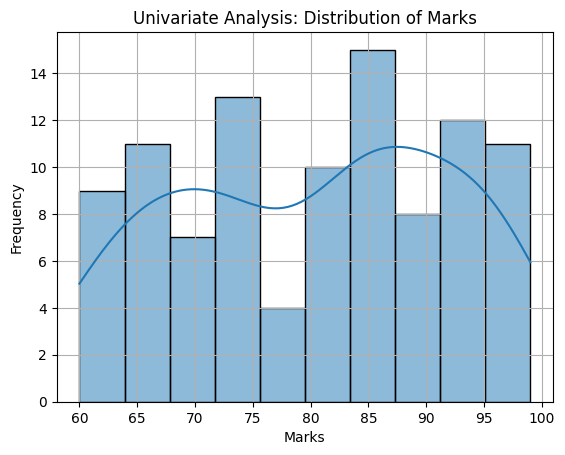

In [ ]:
#1. Univariate Analysis (e.g., Marks)
sns.histplot(df['Marks'], kde=True, bins=10)
plt.title("Univariate Analysis: Distribution of Marks")
plt.xlabel("Marks")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

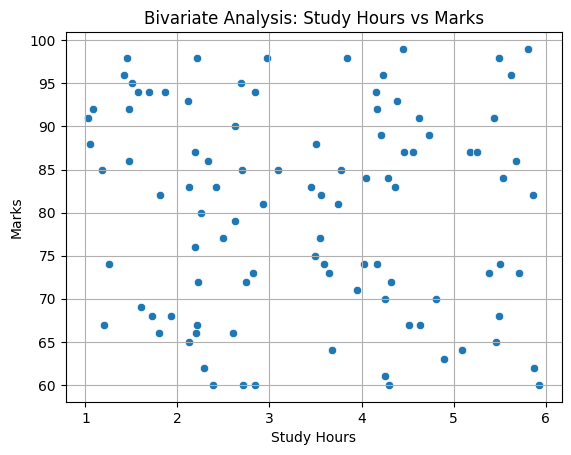

Correlation matrix:
            StudyHours     Marks
StudyHours    1.000000 -0.064129
Marks        -0.064129  1.000000


In [ ]:
# 2. Bivariate Analysis (Numerical vs Numerical): Study Hours vs Marks
sns.scatterplot(data=df, x='StudyHours', y='Marks')
plt.title("Bivariate Analysis: Study Hours vs Marks")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.grid(True)
plt.show()

# Pearson Correlation
print("Correlation matrix:")
print(df[['StudyHours', 'Marks']].corr())

In [ ]:
# 3. Chi-Square Test (Categorical vs Categorical)
# Create a sample categorical dataset
data = pd.DataFrame({
    'Gender': ['Male'] * 50 + ['Female'] * 60,
    'BuysProduct': ['Yes'] * 30 + ['No'] * 20 + ['Yes'] * 50 + ['No'] * 10
})

# Contingency Table
ct = pd.crosstab(data['Gender'], data['BuysProduct'])
print("Contingency Table:")
print(ct)

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi-Square Statistic: {chi2:.2f}, p-value: {p:.4f}")

Contingency Table:
BuysProduct  No  Yes
Gender              
Female       10   50
Male         20   30
Chi-Square Statistic: 6.36, p-value: 0.0117


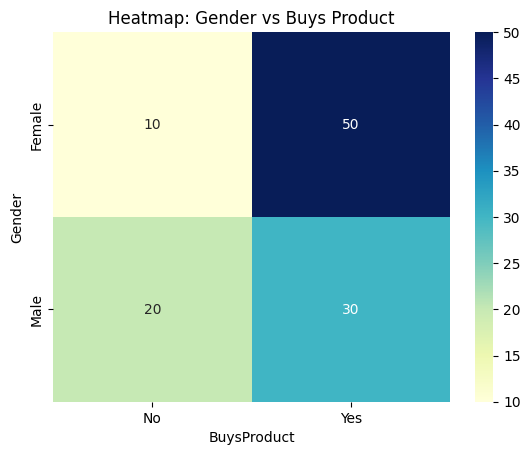

In [ ]:
# Heatmap of Categorical Frequencies
sns.heatmap(ct, annot=True, cmap="YlGnBu")
plt.title("Heatmap: Gender vs Buys Product")
plt.show()


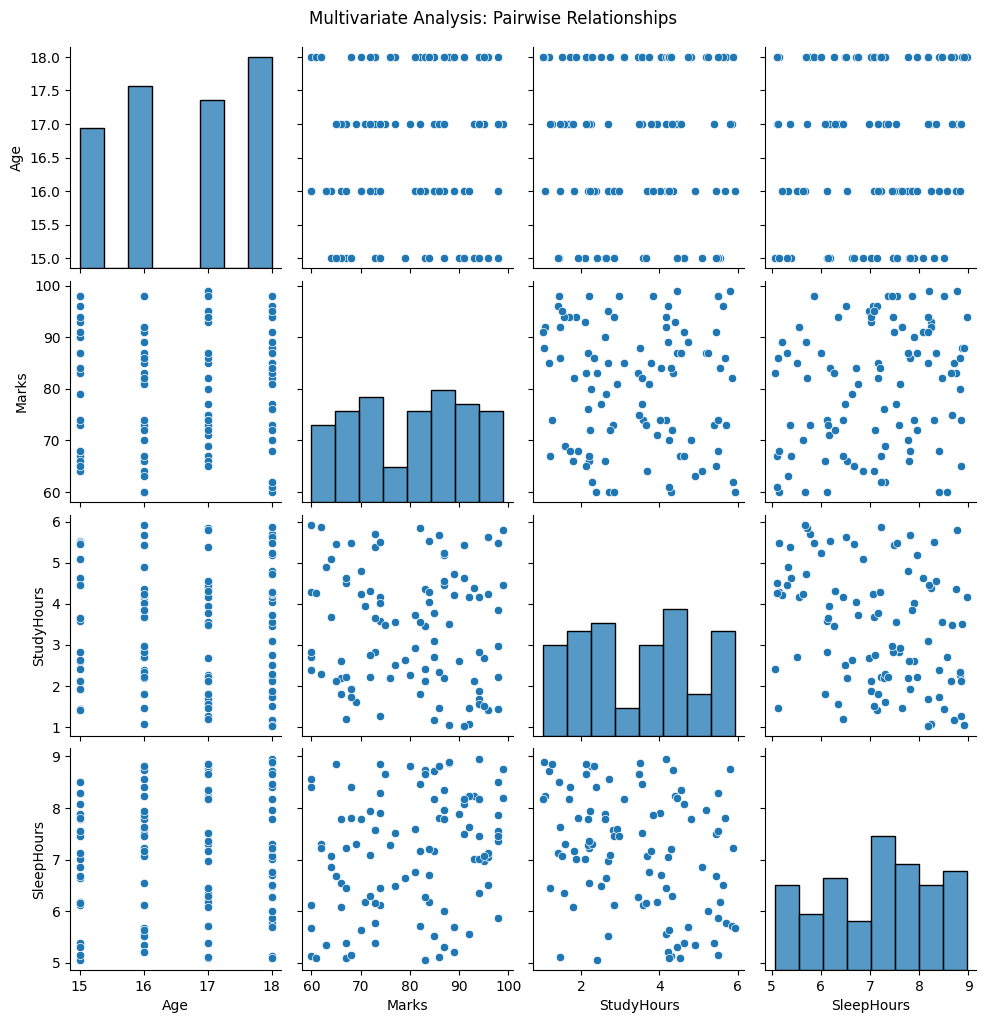

In [8]:
# 4. Multivariate Analysis: Pairplot
sns.pairplot(df)
plt.suptitle("Multivariate Analysis: Pairwise Relationships", y=1.02)
plt.show()

In [9]:
# 5. ANOVA Test (e.g., Marks across Grades)
df['Grade'] = np.where(df['Marks'] > 85, 'A',
                np.where(df['Marks'] > 70, 'B', 'C'))

# Separate data into groups
group_A = df[df['Grade'] == 'A']['Marks']
group_B = df[df['Grade'] == 'B']['Marks']
group_C = df[df['Grade'] == 'C']['Marks']

# Run ANOVA
f_stat, p_val = f_oneway(group_A, group_B, group_C)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")

ANOVA F-statistic: 330.47, p-value: 0.0000
